In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install seaborn --upgrade

In [ ]:
!pip install koreanize_matplotlib

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [ ]:
%config InlineBackend.figure_foremat = 'retina'

In [ ]:
# scv 파일을 불러와서 df 변수에 저장하기
df = pd.read_csv('/content/drive/MyDrive/빅분/2024/소상공인시장진흥공단_상가(상권)정보_서울_202312 (1).xls',low_memory=False)
df

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220805430767,토끼정,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1150010500107740012000001,마커스빌딩,서울특별시 강서구 마곡동로 55,157805,7802,NaN,2,NaN,126.833022,37.560053
1,MA010120220805430763,카페숲,NaN,I2,음식,I212,비알코올,I21201,카페,I56221,...,1154510300109290010016890,NaN,서울특별시 금천구 시흥대로40길 129,153860,8647,NaN,1,NaN,126.909939,37.446689
2,MA010120220805430969,다이앤,NaN,G2,소매,G209,섬유·의복·신발 소매,G20902,여성 의류 소매업,G47412,...,1114016200107750000009546,제일평화시장,서울특별시 중구 마장로 13,100837,4567,NaN,1,NaN,127.011381,37.568503
3,MA010120220805431023,숯불에닭,NaN,I2,음식,I201,한식,I20110,닭/오리고기 구이/찜,I56111,...,1147010300109710004007555,NaN,서울특별시 양천구 지양로 60,158846,8040,NaN,1,NaN,126.834524,37.520990
4,MA010120220805431191,맑은에스테틱,NaN,S2,수리·개인,S208,욕탕·신체관리,S20802,마사지/안마,S96122,...,1121510500100480053015378,NaN,서울특별시 광진구 뚝섬로32길 33,143843,5085,NaN,1,NaN,127.066814,37.534047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489867,MA010120220804254954,모아모아세탁,NaN,S2,수리·개인,S209,세탁,S20901,세탁소,S96912,...,1171010400101630001011783,NaN,서울특별시 송파구 송이로 19,138853,5672,NaN,1,NaN,127.116361,37.503378
489868,MA010120220808716142,지에스25강동,NaN,G2,소매,G204,종합 소매,G20405,편의점,G47122,...,1174010800100780010006592,케이디빌딩,서울특별시 강동구 올림픽로 622,134840,5378,NaN,NaN,NaN,127.123174,37.536903
489869,MA010120220806734217,런베이,NaN,S2,수리·개인,S203,자동차 수리·세차,S20302,자동차 세차장,S95213,...,1147010100102080010000365,이엠피빌딩,서울특별시 양천구 목동남로4길 31,158851,8101,NaN,1,NaN,126.866017,37.509097
489870,MA010120220806779253,북카페,NaN,I2,음식,I212,비알코올,I21201,카페,I56221,...,1123010200100290003038276,용두문화복지센터,서울특별시 동대문구 고산자로28길 13,130817,2565,NaN,2,NaN,127.039129,37.575300


In [ ]:
# 상권업종대분류명의 유일값을 출력한다.
df['상권업종대분류명'].unique()

array(['음식', '소매', '수리·개인', '시설관리·임대', '과학·기술', '교육', '예술·스포츠', '숙박',
       '부동산', '보건의료'], dtype=object)

In [ ]:
# 상권업종대분류명이 교육인 것을 복사하여 study라는 변수에 담는다            `
study = df[df['상권업종대분류명'] == '교육'].copy()
# study를 출력한다.
study

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
22,MA010120220805435769,드라이빙존운전면허,NaN,P1,교육,P106,기타 교육,P10623,운전학원,R91221,...,1135010500106930004000370,동익빌딩,서울특별시 노원구 상계로 59,139827,1694,NaN,3,NaN,127.061536,37.656178
28,MA010120220805438291,마샬아츠트릭킹아크로바틱팀나르샤,NaN,P1,교육,P106,기타 교육,P10603,요가/필라테스 학원,P85612,...,1138010900100400001046229,백송빌딩,서울특별시 은평구 가좌로 321,122883,3441,NaN,B1,NaN,126.909316,37.596031
31,MA010120220805436530,생수학원,NaN,P1,교육,P105,일반 교육,P10501,입시·교과학원,P85501,...,1168010600109770016013256,NaN,서울특별시 강남구 삼성로64길 51,135842,6190,NaN,2,NaN,127.064442,37.501095
37,MA010120220805439311,연필라테스,NaN,P1,교육,P106,기타 교육,P10603,요가/필라테스 학원,R91139,...,1168010500100490007027625,NaN,서울특별시 강남구 봉은사로73길 5,135868,6096,NaN,4,NaN,127.050666,37.512798
73,MA010120220805446636,작업공감협동조합,NaN,P1,교육,P106,기타 교육,P10625,기타 기술/직업 훈련학원,P85669,...,1162010200201040007000001,NaN,서울특별시 관악구 난곡로 78,151017,8861,NaN,4,NaN,126.919228,37.462444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489782,MA010120220805027984,뮤엠영어뉴웨이학원,NaN,P1,교육,P105,일반 교육,P10501,입시·교과학원,P85501,...,1162010200105880001001763,NaN,서울특별시 관악구 난우길 39,151888,8849,NaN,2,NaN,126.917381,37.476132
489791,MA010120220804072466,한국주식가치평가원,NaN,P1,교육,P106,기타 교육,P10621,직원 훈련기관,P85650,...,1168010800101150007006224,미성빌딩,서울특별시 강남구 학동로 311,135821,6061,NaN,NaN,NaN,127.036901,37.516191
489813,MA010120220807718266,플레이어싸커,NaN,P1,교육,P106,기타 교육,P10603,요가/필라테스 학원,P85612,...,1165010200100020037004906,대명빌딩,서울특별시 서초구 남부순환로 2652,137886,6739,NaN,1,NaN,127.040838,37.485227
489855,MA010120220812912121,수학은권상호수학학원,NaN,P1,교육,P105,일반 교육,P10501,입시·교과학원,P85501,...,1129013500100840043000001,종암동새마을금고,서울특별시 성북구 종암로21길 25,136863,2804,NaN,2,NaN,127.033572,37.599745


In [ ]:
# study변수에 데이터타입을 확인한다.
study.dtypes

상가업소번호        object
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지        float64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호          int64
신우편번호          int64
동정보          float64
층정보           object
호정보          float64
경도           float64
위도           float64
dtype: object

In [ ]:
# study 데이터와 컬럼별 결측치 값을 n 변수에 저장하고 출력하기
n = study.isnull().sum()
n

상가업소번호           0
상호명              0
지점명          27320
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드        13
표준산업분류명         13
시도코드             0
시도명              0
시군구코드            0
시군구명             0
행정동코드            0
행정동명             0
법정동코드            0
법정동명             0
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지         4838
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        24122
건물관리번호           3
건물명          11955
도로명주소            0
구우편번호            0
신우편번호            0
동정보          27566
층정보           7223
호정보          27566
경도               0
위도               0
dtype: int64

In [ ]:
# 결측치가 저장되어 있는 변수(n) 값을 내림차순으로 정렬하여 bot_use에 저장하고 출력하기
not_use = n.sort_values(ascending=False)
not_use

호정보          27566
동정보          27566
지점명          27320
건물부번지        24122
건물명          11955
층정보           7223
지번부번지         4838
표준산업분류명         13
표준산업분류코드        13
건물관리번호           3
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
상가업소번호           0
도로명주소            0
대지구분명            0
구우편번호            0
신우편번호            0
경도               0
지번본번지            0
지번코드             0
대지구분코드           0
시도코드             0
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
시도명              0
상호명              0
시군구코드            0
시군구명             0
행정동코드            0
행정동명             0
법정동코드            0
법정동명             0
위도               0
dtype: int64

In [ ]:
# 결측치가 저장되어 있는 변수(n) 값을 내림차순으로 정렬하여 상위 10개만 출력하기     `
not_use = n.sort_values(ascending=False).head(10)
not_use

호정보         27566
동정보         27566
지점명         27320
건물부번지       24122
건물명         11955
층정보          7223
지번부번지        4838
표준산업분류명        13
표준산업분류코드       13
건물관리번호          3
dtype: int64

In [ ]:
# not_use에서 컬럼 이름만 가지고와서 not_use_col에 저장하고 출력하기        `
not_use_col = not_use.index
not_use_col

Index(['호정보', '동정보', '지점명', '건물부번지', '건물명', '층정보', '지번부번지', '표준산업분류명',
       '표준산업분류코드', '건물관리번호'],
      dtype='object')

In [ ]:
# 삭제 전 현재 데이터 행, 열 갯수 확인
print(study.shape)
study = study.drop(not_use_col, axis = 1)
print(study.shape)

(27566, 39)
(27566, 29)


In [ ]:
# study변수의 컬럼확인하기
study.columns

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '도로명주소', '구우편번호', '신우편번호', '경도', '위도'],
      dtype='object')

In [ ]:
# study변수의 코드나 번호가 들어간 컬럼을 cols_code에 저장하기
cols_code = study.columns[study.columns.str.contains('코드|번호')]

In [ ]:
# cols_code 출력하기
cols_code

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '구우편번호', '신우편번호'],
      dtype='object')

In [ ]:
# study의 행과 열 출력하기
print(study.shape)

(27566, 29)


In [ ]:
# study변수에 cols_code변수를 지우고 study에 저장하기
study = study.drop(cols_code, axis =1)

In [ ]:
# study의 행과 열 출력하여 잘 지워졌나 확인하기
print(study.shape)

(27566, 16)


In [ ]:
# study변수에 정보 확인하기
study.info

<bound method DataFrame.info of                      상호명 상권업종대분류명 상권업종중분류명       상권업종소분류명    시도명 시군구명   행정동명  \
22             드라이빙존운전면허       교육    기타 교육           운전학원  서울특별시  노원구  상계10동   
28      마샬아츠트릭킹아크로바틱팀나르샤       교육    기타 교육     요가/필라테스 학원  서울특별시  은평구   신사2동   
31                  생수학원       교육    일반 교육        입시·교과학원  서울특별시  강남구   대치2동   
37                 연필라테스       교육    기타 교육     요가/필라테스 학원  서울특별시  강남구   삼성2동   
73              작업공감협동조합       교육    기타 교육  기타 기술/직업 훈련학원  서울특별시  관악구    난향동   
...                  ...      ...      ...            ...    ...  ...    ...   
489782         뮤엠영어뉴웨이학원       교육    일반 교육        입시·교과학원  서울특별시  관악구    미성동   
489791         한국주식가치평가원       교육    기타 교육        직원 훈련기관  서울특별시  강남구   논현2동   
489813            플레이어싸커       교육    기타 교육     요가/필라테스 학원  서울특별시  서초구   양재1동   
489855        수학은권상호수학학원       교육    일반 교육        입시·교과학원  서울특별시  성북구    종암동   
489859          세종피아노교습소       교육    기타 교육           음악학원  서울특별시  서초구   양재1동   

       법정동명 대지구분명  지번본번지                  지번주소                도로명   건물본번지  \
22      상계동    대지    693   서울특별시 노원구 상계동 693-4      서울특별시 노원구 상계로    59.0   
28      신사동    대지     40    서울특별시 은평구 신사동 40-1      서울특별시 은평구 가좌로   321.0   
31      대치동    대지    977  서울특별시 강남구 대치동 977-16   서울특별시 강남구 삼성로64길    51.0   
37      삼성동    대지     49    서울특별시 강남구 삼성동 49-7  서울특별시 강남구 봉은사로73길     5.0   
73      신림동    대지   1736  서울특별시 관악구 신림동 1736-2      서울특별시 관악구 난곡로    78.0   
...     ...   ...    ...                   ...                ...     ...   
489782  신림동    대지    588   서울특별시 관악구 신림동 588-1      서울특별시 관악구 난우길    39.0   
489791  논현동    대지    115   서울특별시 강남구 논현동 115-7      서울특별시 강남구 학동로   311.0   
489813  양재동    대지      2    서울특별시 서초구 양재동 2-37    서울특별시 서초구 남부순환로  2652.0   
489855  종암동    대지     84   서울특별시 성북구 종암동 84-43   서울특별시 성북구 종암로21길    25.0   
489859  우면동    대지    766     서울특별시 서초구 우면동 766   서울특별시 서초구 양재대로2길   116.0   

                         도로명주소          경도         위도  
22            서울특별시 노원구 상계로 59  127.061536  37.656178  
28           서울특별시 은평구 가좌로 321  126.909316  37.596031  
31         서울특별시 강남구 삼성로64길 51  127.064442  37.501095  
37         서울특별시 강남구 봉은사로73길 5  127.050666  37.512798  
73            서울특별시 관악구 난곡로 78  126.919228  37.462444  
...                        ...         ...        ...  
489782        서울특별시 관악구 난우길 39  126.917381  37.476132  
489791       서울특별시 강남구 학동로 311  127.036901  37.516191  
489813    서울특별시 서초구 남부순환로 2652  127.040838  37.485227  
489855     서울특별시 성북구 종암로21길 25  127.033572  37.599745  
489859  서울특별시 서초구 양재대로2길 116-6  127.015435  37.456473  

[27566 rows x 16 columns]>

In [ ]:
# study변수에 지번본번지의 데이터타입을 float형으로 바꾼후 study의 지번본지에 저장하기
study['지번본번지'] = study['지번본번지'].astype(float)

In [ ]:
# 잘 들어갔나 확인하기
study['지번본번지'].dtype

dtype('float64')

In [ ]:
# study 데이터의 상호명 기준으로 빈도수 구하기
study['상호명'].value_counts()

상호명
입시·교과학원         112
아메리카요가           16
모던필라테스           16
음악학원             16
고수의운전면허          14
               ... 
에이치앤씨직무인증원        1
평생교육원말과활아카데미      1
비바체               1
렘브란트의풍차           1
세종피아노교습소          1
Name: count, Length: 26145, dtype: int64

In [ ]:
# 시군구별 '교육' 상가 빈도수 확인하기
study['시군구명'].value_counts()

시군구명
강남구     4418
서초구     2626
송파구     1913
마포구     1743
강서구     1373
양천구     1323
영등포구    1140
강동구     1011
노원구      963
관악구      918
광진구      858
은평구      838
성북구      835
종로구      812
서대문구     808
구로구      775
성동구      762
동작구      752
동대문구     658
용산구      608
금천구      536
중랑구      507
도봉구      475
중구       464
강북구      450
Name: count, dtype: int64

In [ ]:
# df변수의 사분위수 확인하기
df.describe()

,시도코드,시군구코드,행정동코드,법정동코드,지번코드,대지구분코드,지번본번지,지번부번지,도로명코드,건물본번지,건물부번지,구우편번호,신우편번호,동정보,호정보,경도,위도
count,489872.0,489872.000000,4.898720e+05,4.898720e+05,4.898720e+05,489872.000000,489872.000000,409619.000000,4.898720e+05,489871.000000,64627.000000,489872.000000,489872.000000,0.0,0.0,489872.000000,489872.000000
mean,11.0,11461.211347,1.146182e+07,1.146132e+09,1.146132e+18,1.001049,428.067505,33.235502,1.146157e+11,142.657367,7.866511,136998.199693,5347.694383,NaN,NaN,126.992568,37.540489
std,0.0,197.261198,1.972487e+05,1.972544e+07,1.972544e+16,0.032375,437.729618,100.781114,1.972616e+09,263.319204,9.239026,14237.441400,2086.428275,NaN,NaN,0.082296,0.047527
min,11.0,11110.000000,1.111052e+07,1.111010e+09,1.111010e+18,1.000000,1.000000,1.000000,1.111020e+11,1.000000,1.000000,100011.000000,1000.000000,NaN,NaN,126.768169,37.430448
25%,11.0,11290.000000,1.129059e+07,1.129012e+09,1.129012e+18,1.000000,97.000000,4.000000,1.129031e+11,18.000000,1.000000,131859.000000,3787.000000,NaN,NaN,126.922231,37.501748
50%,11.0,11500.000000,1.150059e+07,1.150010e+09,1.150010e+18,1.000000,299.000000,11.000000,1.150031e+11,46.000000,5.000000,137800.000000,5562.000000,NaN,NaN,127.009258,37.536555
75%,11.0,11650.000000,1.165056e+07,1.165011e+09,1.165011e+18,1.000000,648.000000,26.000000,1.165042e+11,157.000000,11.000000,150095.000000,6971.000000,NaN,NaN,127.052027,37.568425
max,11.0,11740.000000,1.174070e+07,1.174011e+09,1.174011e+18,2.000000,9999.000000,3883.000000,1.174049e+11,3646.000000,203.000000,158887.000000,8866.000000,NaN,NaN,127.182638,37.692595


In [ ]:
# study의 상권업종중분류명의 유일값 확인하기
study['상권업종중분류명'].unique()

array(['기타 교육', '일반 교육', '교육 지원'], dtype=object)

In [ ]:
# study의 상권업종소분류명의 유일값 확인하기
study['상권업종소분류명'].unique()

array(['운전학원', '요가/필라테스 학원', '입시·교과학원', '기타 기술/직업 훈련학원', '그 외 기타 교육기관',
       '기타 교육지원 서비스업', '기타 예술/스포츠 교육기관', '사회교육시설', '음악학원', '미술학원',
       '레크리에이션 교육기관', '교육컨설팅업', '청소년 수련시설', '전문자격/고시학원', '직원 훈련기관',
       '태권도/무술학원', '외국어학원', '컴퓨터 학원'], dtype=object)

In [ ]:
# study의 상권업종소분류명의 value값의 갯수세서 study_count에 저장하기
study_count = study['상권업종소분류명'].value_counts()
# 출력하기
study_count

상권업종소분류명
입시·교과학원           7063
요가/필라테스 학원        4567
기타 기술/직업 훈련학원     2624
기타 교육지원 서비스업      2403
그 외 기타 교육기관       1709
교육컨설팅업            1626
음악학원              1445
미술학원              1090
기타 예술/스포츠 교육기관    1001
태권도/무술학원           870
외국어학원              861
직원 훈련기관            804
레크리에이션 교육기관        734
컴퓨터 학원             224
사회교육시설             222
전문자격/고시학원          161
운전학원                90
청소년 수련시설            72
Name: count, dtype: int64

In [ ]:
# 그룹화하기
# 시군구명과 상권업종중분류명을 기준으로 멀티인덱스
# 상호명으로 기준으로 갯수 세주기
# 결과를 study_goup에 저장 후 출력하기               `
study_group = study.groupby(['시군구명','상권업종소분류명'])['상호명'].count()
study_group

시군구명  상권업종소분류명      
강남구   교육컨설팅업            409
      그 외 기타 교육기관       246
      기타 교육지원 서비스업      574
      기타 기술/직업 훈련학원     328
      기타 예술/스포츠 교육기관    135
                       ... 
중랑구   전문자격/고시학원           2
      직원 훈련기관            12
      청소년 수련시설            1
      컴퓨터 학원              2
      태권도/무술학원           27
Name: 상호명, Length: 448, dtype: int64

In [ ]:
# study변수를 사용하여 피벗테이블을 만든다 시군구명별로 상권업종소분류명의 갯수를 만든다.
study.pivot_table(index = ['시군구명','상권업종소분류명'], values = '상호명',
                 aggfunc = 'count')

상호명
시군구명 상권업종소분류명           
강남구  교육컨설팅업          409
     그 외 기타 교육기관     246
     기타 교육지원 서비스업    574
     기타 기술/직업 훈련학원   328
     기타 예술/스포츠 교육기관  135
...                  ...
중랑구  전문자격/고시학원         2
     직원 훈련기관          12
     청소년 수련시설          1
     컴퓨터 학원            2
     태권도/무술학원         27

[448 rows x 1 columns]

In [ ]:
# study_group변수에 강남구에 태권도/무술학원의 갯수를 센다
study_group['강남구']['태권도/무술학원']

65

In [ ]:
# 그룹화하기
# 시군구명과 상권업종중분류명을 기준으로 멀티인덱스
# 상호명으로 기준으로 갯수 세주기
# 결과를 study_goup에 저장
study_goup = study.groupby(['상권업종소분류명','시군구명'])['상호명'].count()
study_goup

상권업종소분류명  시군구명
교육컨설팅업    강남구     409
          강동구      28
          강북구      14
          강서구      47
          관악구      45
                 ... 
태권도/무술학원  용산구      13
          은평구      40
          종로구       9
          중구        6
          중랑구      27
Name: 상호명, Length: 448, dtype: int64

In [ ]:
# study_group2변수의 태권도/ 무술학원컬럼을 확인한다.
study_group2 = study.groupby(['상권업종소분류명','시군구명'])['상호명'].count()
study_group2['태권도/무술학원']

시군구명
강남구     65
강동구     50
강북구     37
강서구     62
관악구     46
광진구     27
구로구     25
금천구     19
노원구     51
도봉구     31
동대문구    23
동작구     35
마포구     33
서대문구    27
서초구     51
성동구     20
성북구     42
송파구     54
양천구     41
영등포구    36
용산구     13
은평구     40
종로구      9
중구       6
중랑구     27
Name: 상호명, dtype: int64

In [ ]:
# study변수에 상권업종소분류명의 유일값 확인하기
study['상권업종소분류명'].unique()

array(['운전학원', '요가/필라테스 학원', '입시·교과학원', '기타 기술/직업 훈련학원', '그 외 기타 교육기관',
       '기타 교육지원 서비스업', '기타 예술/스포츠 교육기관', '사회교육시설', '음악학원', '미술학원',
       '레크리에이션 교육기관', '교육컨설팅업', '청소년 수련시설', '전문자격/고시학원', '직원 훈련기관',
       '태권도/무술학원', '외국어학원', '컴퓨터 학원'], dtype=object)

In [ ]:
# study_group2에 사회교육시설이 있는 시군구명의 갯수를 센다
study_group2['사회교육시설'].sort_values()

시군구명
도봉구      1
강북구      2
관악구      2
노원구      3
용산구      3
중랑구      4
광진구      4
성북구      4
강동구      5
성동구      5
동작구      6
양천구      7
강서구      8
금천구      8
동대문구     9
서대문구     9
중구       9
구로구      9
은평구     11
송파구     14
영등포구    14
종로구     16
마포구     16
서초구     25
강남구     28
Name: 상호명, dtype: int64

In [ ]:
# study_count의 value갯수가 1000개 이상인 것만 study_count_1000변수에 저장한다.
study_count_1000 = study_count[study_count.values >= 1000]

In [ ]:
# study_count변수의 value를 확인한다.
study_count.values

array([7063, 4567, 2624, 2403, 1709, 1626, 1445, 1090, 1001,  870,  861,
        804,  734,  224,  222,  161,   90,   72])

In [ ]:
# study_group변수의 인덱스를 열로 변환하여 t변수에 저장한다.
t = study_group.reset_index()
# 출력한다.
t

,시군구명,상권업종소분류명,상호명
0,강남구,교육컨설팅업,409
1,강남구,그 외 기타 교육기관,246
2,강남구,기타 교육지원 서비스업,574
3,강남구,기타 기술/직업 훈련학원,328
4,강남구,기타 예술/스포츠 교육기관,135
...,...,...,...
443,중랑구,전문자격/고시학원,2
444,중랑구,직원 훈련기관,12
445,중랑구,청소년 수련시설,1
446,중랑구,컴퓨터 학원,2


In [ ]:
# t컬럼의 이름이 상호명을 상호수로 바꾼후 t변수에 저장한다
t = t.rename(columns={'상호명': '상호수'})
# t변수를 출력하여 확인한다.
t

,시군구명,상권업종소분류명,상호수
0,강남구,교육컨설팅업,409
1,강남구,그 외 기타 교육기관,246
2,강남구,기타 교육지원 서비스업,574
3,강남구,기타 기술/직업 훈련학원,328
4,강남구,기타 예술/스포츠 교육기관,135
...,...,...,...
443,중랑구,전문자격/고시학원,2
444,중랑구,직원 훈련기관,12
445,중랑구,청소년 수련시설,1
446,중랑구,컴퓨터 학원,2


In [ ]:
# study변수의 행과 열을 출력한다.
study.shape

(27566, 16)

In [ ]:
# study 데이터에서 study_count 변수를 이용해서 상권업종소분류명이 1000개 이상인 데이터만 가져오기
study_selected = study[study['상권업종소분류명'].isin(study_count_1000.index)]

In [ ]:
# study_selected의 행과 열을 출력한다.
study_selected.shape

(23528, 16)

In [ ]:
# study_selected 데이터를 이용해 은평구 데이터만 가져오기
study_selected['시군구명'] == '은평구'
study_selected[study_selected['시군구명'] == '은평구']

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
28,마샬아츠트릭킹아크로바틱팀나르샤,교육,기타 교육,요가/필라테스 학원,서울특별시,은평구,신사2동,신사동,대지,40.0,서울특별시 은평구 신사동 40-1,서울특별시 은평구 가좌로,321.0,서울특별시 은평구 가좌로 321,126.909316,37.596031
3443,플라톤아카데미독서토론논술응암교습소,교육,일반 교육,입시·교과학원,서울특별시,은평구,응암2동,응암동,대지,760.0,서울특별시 은평구 응암동 760,서울특별시 은평구 백련산로,38.0,서울특별시 은평구 백련산로 38,126.923094,37.589175
3613,더심플스타트,교육,기타 교육,그 외 기타 교육기관,서울특별시,은평구,진관동,진관동,대지,14.0,서울특별시 은평구 진관동 14,서울특별시 은평구 진관4로,37.0,서울특별시 은평구 진관4로 37,126.925050,37.644462
3885,퍼씰학원,교육,일반 교육,입시·교과학원,서울특별시,은평구,갈현2동,갈현동,대지,463.0,서울특별시 은평구 갈현동 463-3,서울특별시 은평구 연서로,165.0,서울특별시 은평구 연서로 165,126.917305,37.613621
4101,로어컴퍼니,교육,기타 교육,그 외 기타 교육기관,서울특별시,은평구,갈현2동,갈현동,대지,450.0,서울특별시 은평구 갈현동 450-9,서울특별시 은평구 갈현로,251.0,서울특별시 은평구 갈현로 251-1,126.915497,37.619515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484802,배리어프리세상협동조합,교육,기타 교육,그 외 기타 교육기관,서울특별시,은평구,녹번동,녹번동,대지,48.0,서울특별시 은평구 녹번동 48-5,서울특별시 은평구 은평로,245.0,서울특별시 은평구 은평로 245,126.935130,37.601097
485624,아이앤지필라테스새절점,교육,기타 교육,요가/필라테스 학원,서울특별시,은평구,응암3동,응암동,대지,584.0,서울특별시 은평구 응암동 584-50,서울특별시 은평구 가좌로,256.0,서울특별시 은평구 가좌로 256,126.915001,37.592074
486432,원업필라테스,교육,기타 교육,요가/필라테스 학원,서울특별시,은평구,진관동,진관동,대지,70.0,서울특별시 은평구 진관동 70,서울특별시 은평구 진관2로,15.0,서울특별시 은평구 진관2로 15-46,126.919072,37.638614
488285,대치미래인재수학학원,교육,일반 교육,입시·교과학원,서울특별시,은평구,역촌동,역촌동,대지,8.0,서울특별시 은평구 역촌동 8-77,서울특별시 은평구 연서로,106.0,서울특별시 은평구 연서로 106,126.915852,37.608355


In [ ]:
# 은평구의 법적동명 갯수 확인하기, 판다스 함수 이용
study_selected[study_selected['시군구명'] == '은평구']['법정동명'].nunique()

11

In [ ]:
# 은평구의 법정동명 기준 빈도수 계산하기
study_selected[study_selected['시군구명'] == '은평구']['법정동명'].value_counts()
study_selected[study_selected['시군구명'] == '은평구']['법정동명'].value_counts(normalize = True)

법정동명
응암동    0.183731
갈현동    0.133240
녹번동    0.116410
진관동    0.113604
역촌동    0.098177
불광동    0.095372
신사동    0.082749
대조동    0.075736
구산동    0.056101
증산동    0.032258
수색동    0.012623
Name: proportion, dtype: float64

In [ ]:
# study_selected의 법정동명이 불광동인 것을 출력한다.
study_selected[study_selected['법정동명'] == '불광동']

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
6034,하나요가,교육,기타 교육,요가/필라테스 학원,서울특별시,은평구,불광1동,불광동,대지,274.0,서울특별시 은평구 불광동 274-13,서울특별시 은평구 불광로,39.0,서울특별시 은평구 불광로 39,126.929921,37.611366
10091,플라잉요가인,교육,기타 교육,요가/필라테스 학원,서울특별시,은평구,불광1동,불광동,대지,281.0,서울특별시 은평구 불광동 281-34,서울특별시 은평구 불광로,50.0,서울특별시 은평구 불광로 50-14,126.931557,37.610985
13845,잉글리쉬주영어학원,교육,일반 교육,입시·교과학원,서울특별시,은평구,불광2동,불광동,대지,104.0,서울특별시 은평구 불광동 104-23,서울특별시 은평구 연서로,311.0,서울특별시 은평구 연서로 311,126.927338,37.623255
25299,플라톤아카데미불광독서논술교습소,교육,일반 교육,입시·교과학원,서울특별시,은평구,불광1동,불광동,대지,601.0,서울특별시 은평구 불광동 601-3,서울특별시 은평구 불광로2길,6.0,서울특별시 은평구 불광로2길 6-1,126.932428,37.611858
35223,모티베이터영수3관학원,교육,일반 교육,입시·교과학원,서울특별시,은평구,불광1동,불광동,대지,281.0,서울특별시 은평구 불광동 281-12,서울특별시 은평구 불광로,54.0,서울특별시 은평구 불광로 54,126.931466,37.611813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422128,델리벨로수학교습소,교육,일반 교육,입시·교과학원,서울특별시,은평구,불광1동,불광동,대지,328.0,서울특별시 은평구 불광동 328-1,서울특별시 은평구 연서로32길,19.0,서울특별시 은평구 연서로32길 19,126.924399,37.618885
429672,스마트해법영어BNB영어교습소,교육,일반 교육,입시·교과학원,서울특별시,은평구,불광1동,불광동,대지,276.0,서울특별시 은평구 불광동 276-32,서울특별시 은평구 불광로,59.0,서울특별시 은평구 불광로 59,126.931719,37.612329
439850,한국우쿨렐레아카데미,교육,기타 교육,음악학원,서울특별시,은평구,불광1동,불광동,대지,323.0,서울특별시 은평구 불광동 323-6,서울특별시 은평구 통일로78길,11.0,서울특별시 은평구 통일로78길 11-12,126.923610,37.618580
467941,클로이영어교습소,교육,일반 교육,입시·교과학원,서울특별시,은평구,불광1동,불광동,대지,242.0,서울특별시 은평구 불광동 242-26,서울특별시 은평구 불광로,69.0,서울특별시 은평구 불광로 69,126.931843,37.613213


In [ ]:
# study_selected변수에 법정동명이 불광동인 것에서 상권업종소분류명의 갯수를 센다.
study_selected.loc[study_selected['법정동명'] == '불광동','상권업종소분류명'].value_counts()

상권업종소분류명
입시·교과학원           26
요가/필라테스 학원        13
기타 기술/직업 훈련학원      7
기타 교육지원 서비스업       7
음악학원               6
교육컨설팅업             3
미술학원               3
그 외 기타 교육기관        2
기타 예술/스포츠 교육기관     1
Name: count, dtype: int64

In [ ]:
# study_selected의 변수에 시군구명이 강남구인 것중에서 법정동명의 유일값을 출력하기 ( 2가지 방법 )
study_selected[study_selected['시군구명'] == '강남구']['법정동명'].unique()
study_selected.loc[study_selected['시군구명'] == '강남구','법정동명'].unique()

array(['대치동', '삼성동', '신사동', '역삼동', '청담동', '논현동', '도곡동', '일원동', '수서동',
       '세곡동', '자곡동', '개포동', '율현동', '압구정동'], dtype=object)

In [ ]:
# 법정동명이 대치동인 데이터 확인해보기
study_selected[study_selected['법정동명'] == '대치동']

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
31,생수학원,교육,일반 교육,입시·교과학원,서울특별시,강남구,대치2동,대치동,대지,977.0,서울특별시 강남구 대치동 977-16,서울특별시 강남구 삼성로64길,51.0,서울특별시 강남구 삼성로64길 51,127.064442,37.501095
198,유준형화학교습소,교육,일반 교육,입시·교과학원,서울특별시,강남구,대치4동,대치동,대지,920.0,서울특별시 강남구 대치동 920-24,서울특별시 강남구 선릉로68길,17.0,서울특별시 강남구 선릉로68길 17,127.053041,37.499364
250,크레버스영재교육센터대치제1지점,교육,일반 교육,입시·교과학원,서울특별시,강남구,대치1동,대치동,대지,1021.0,서울특별시 강남구 대치동 1021-12,서울특별시 강남구 도곡로,456.0,서울특별시 강남구 도곡로 456,127.060281,37.498341
940,하베르만영재수학학원,교육,일반 교육,입시·교과학원,서울특별시,강남구,대치4동,대치동,대지,922.0,서울특별시 강남구 대치동 922-1,서울특별시 강남구 선릉로,324.0,서울특별시 강남구 선릉로 324,127.052079,37.498518
1059,1%국어교습소,교육,일반 교육,입시·교과학원,서울특별시,강남구,대치4동,대치동,대지,938.0,서울특별시 강남구 대치동 938,서울특별시 강남구 도곡로,405.0,서울특별시 강남구 도곡로 405,127.054650,37.497359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488623,유토마프리미엄학원,교육,일반 교육,입시·교과학원,서울특별시,강남구,대치2동,대치동,대지,976.0,서울특별시 강남구 대치동 976-8,서울특별시 강남구 삼성로72길,64.0,서울특별시 강남구 삼성로72길 64,127.063349,37.500789
488993,스위스코퍼레이션,교육,기타 교육,요가/필라테스 학원,서울특별시,강남구,대치2동,대치동,대지,988.0,서울특별시 강남구 대치동 988-15,서울특별시 강남구 도곡로,505.0,서울특별시 강남구 도곡로 505,127.061691,37.499496
489472,에이스데오,교육,기타 교육,그 외 기타 교육기관,서울특별시,강남구,대치4동,대치동,대지,890.0,서울특별시 강남구 대치동 890-59,서울특별시 강남구 선릉로86길,31.0,서울특별시 강남구 선릉로86길 31,127.052007,37.504203
489486,산에듀,교육,일반 교육,입시·교과학원,서울특별시,강남구,대치4동,대치동,대지,938.0,서울특별시 강남구 대치동 938-22,서울특별시 강남구 도곡로,409.0,서울특별시 강남구 도곡로 409,127.055147,37.497363


In [ ]:
# study_selected변수에서 법정동명이 대치동이고 상권업종소분류명의 갯수를 센다
study_selected.loc[study_selected['법정동명'] == '대치동','상권업종소분류명'].value_counts()

상권업종소분류명
입시·교과학원           717
교육컨설팅업            101
요가/필라테스 학원         84
기타 교육지원 서비스업       68
미술학원               48
그 외 기타 교육기관        35
기타 기술/직업 훈련학원      22
음악학원               12
기타 예술/스포츠 교육기관      7
Name: count, dtype: int64

In [ ]:
# study_selected loc를 사용하여 법정동명이 노량진동인 상권업종소분류명을 센다.
study_selected.loc[study_selected['법정동명'] == '노량진동','상권업종소분류명'].value_counts()

상권업종소분류명
입시·교과학원           22
교육컨설팅업             9
기타 기술/직업 훈련학원      8
요가/필라테스 학원         7
기타 교육지원 서비스업       6
미술학원               6
그 외 기타 교육기관        4
기타 예술/스포츠 교육기관     3
음악학원               2
Name: count, dtype: int64

In [ ]:
# 그룹화해보기
# 상권업종소분류명, 시군구명으로 그룹화하고 상호명으로 빈도수 계산하기
pd.options.display.max_rows = 250
g = study_selected.groupby(['상권업종소분류명','시군구명'])['상호명'].count()
g.sort_values(ascending=False).sort_index(level = [0], ascending = [True], sort_remaining= [False])

상권업종소분류명        시군구명
교육컨설팅업          강남구      409
                서초구      219
                마포구       83
                송파구       83
                영등포구      71
                금천구       64
                종로구       56
                성동구       53
                구로구       50
                서대문구      48
                강서구       47
                중구        47
                용산구       47
                관악구       45
                양천구       40
                노원구       35
                동작구       34
                동대문구      33
                광진구       32
                은평구       30
                강동구       28
                성북구       25
                중랑구       20
                강북구       14
                도봉구       13
그 외 기타 교육기관     강남구      246
                서초구      172
                마포구      136
                송파구      108
                영등포구      99
                종로구       87
                강서구       80
                중구        60
                용산구   

<Axes: ylabel='시군구명'>

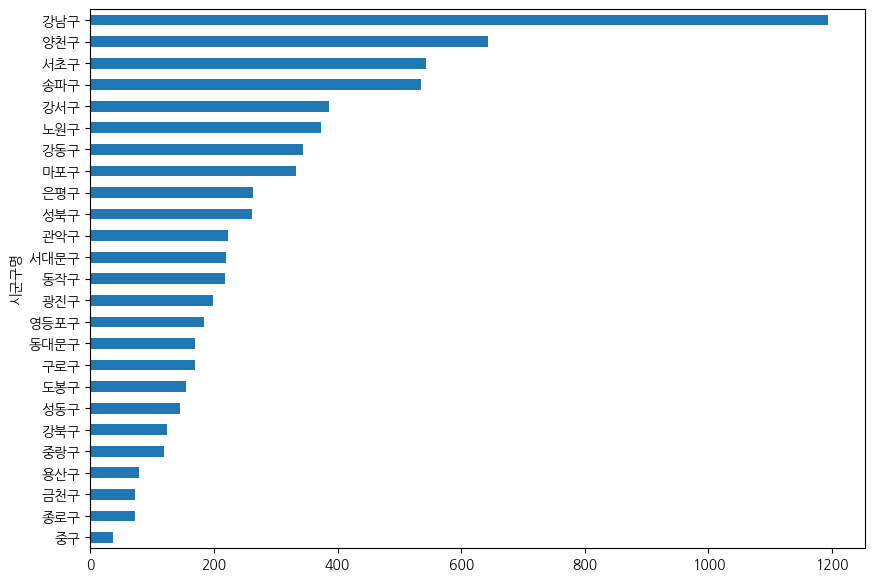

In [ ]:
# g 데이터를 이용하여 상권업종소분류명이 입시·교과학원  시군구별로 시각화하기
g.loc['입시·교과학원'].sort_values().plot.barh(figsize = (10,7))

<Axes: xlabel='상권업종소분류명,시군구명'>

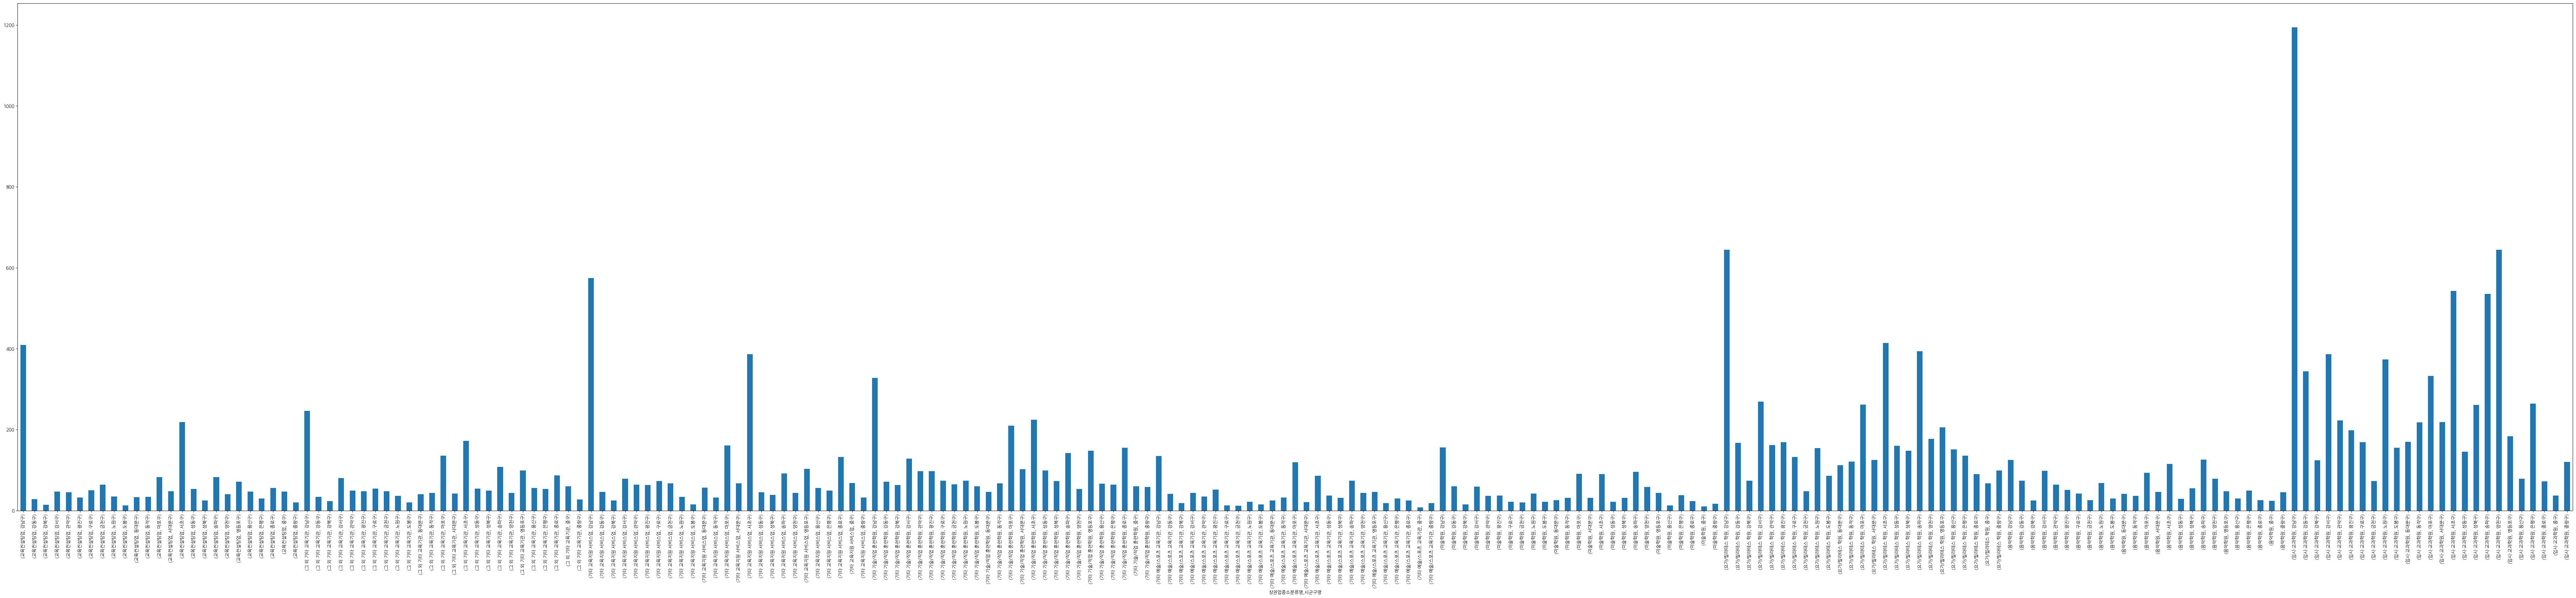

In [ ]:
# g변수를 막대그래프를 그리고 사이즈를 100, 20으로 설정한다
g.plot.bar(figsize = (100,20))

In [ ]:
# g변수에 기존에 설정되어 있는 행 인덱스를 제거하고 그 인덱스를 데이터 열(columns)로 추가하고 t변수에 담는다.
t = g.reset_index()
# t변수를 출력한다
t

,상권업종소분류명,시군구명,상호명
0,교육컨설팅업,강남구,409
1,교육컨설팅업,강동구,28
2,교육컨설팅업,강북구,14
3,교육컨설팅업,강서구,47
4,교육컨설팅업,관악구,45
5,교육컨설팅업,광진구,32
6,교육컨설팅업,구로구,50
7,교육컨설팅업,금천구,64
8,교육컨설팅업,노원구,35
9,교육컨설팅업,도봉구,13


In [ ]:
# t변수에 상호명의 컬럼을 상호수로 변경한후 t변수에 담는다.
t = t.rename(columns = {'상호명': '상호수'})
# t변수를 출력한다.
t

,상권업종소분류명,시군구명,상호수
0,교육컨설팅업,강남구,409
1,교육컨설팅업,강동구,28
2,교육컨설팅업,강북구,14
3,교육컨설팅업,강서구,47
4,교육컨설팅업,관악구,45
5,교육컨설팅업,광진구,32
6,교육컨설팅업,구로구,50
7,교육컨설팅업,금천구,64
8,교육컨설팅업,노원구,35
9,교육컨설팅업,도봉구,13


<Axes: xlabel='시군구명', ylabel='상호수'>

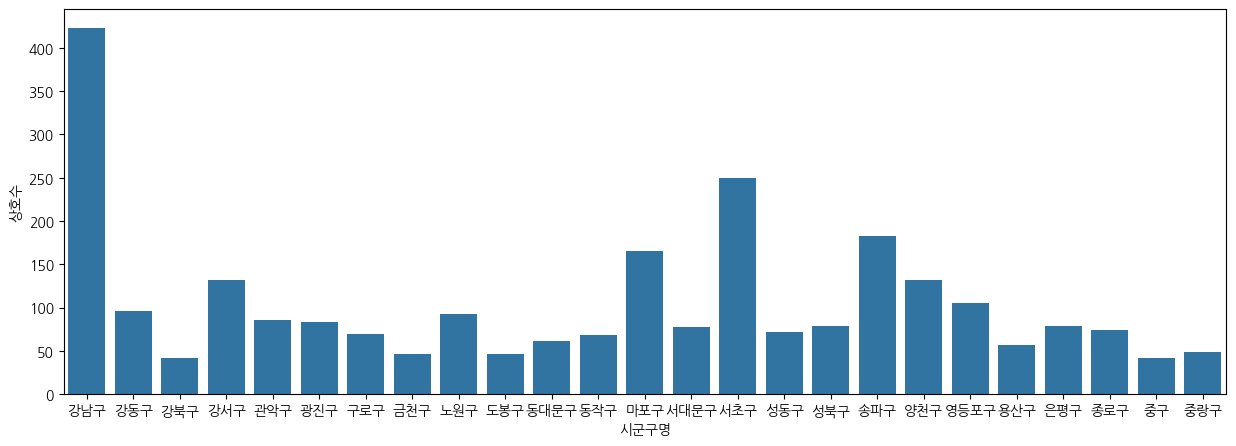

In [ ]:
#seaborn으로 시각화
# 그래프 사이즈는 15, 5
# 데이터는 t변수를 사용
# x축 시군구명 y축 상호수로 해서 막대그래프로 그리기
# 에러막대 없애기
plt.figure(figsize = (15, 5))
sns.barplot(data = t,x = '시군구명', y = '상호수', errorbar = None)

<Axes: xlabel='상권업종소분류명', ylabel='상호수'>

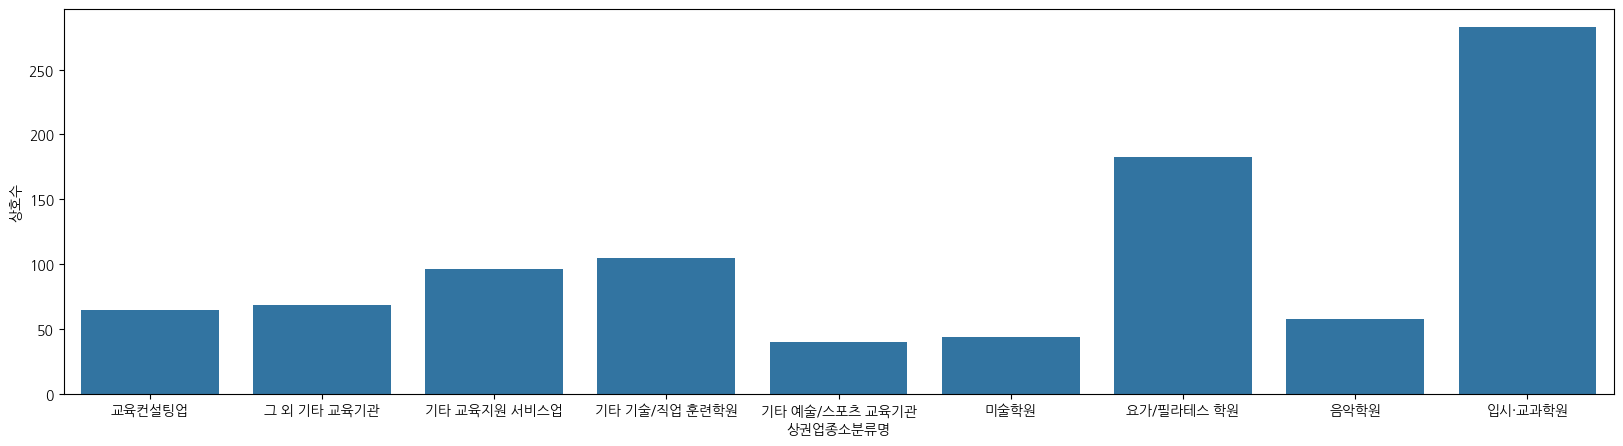

In [ ]:
# 그래프 사이즈 20,5로 하기
# 데이터는 t변수를 사용하기
# x축 상권업종소분류명 y축 상호수로 해서 막대그래프로 그리기
# 에러막대 없애기
plt.figure(figsize = (20, 5))
sns.barplot(data = t,x = '상권업종소분류명', y = '상호수', errorbar = None)

<Figure size 2000x500 with 0 Axes>

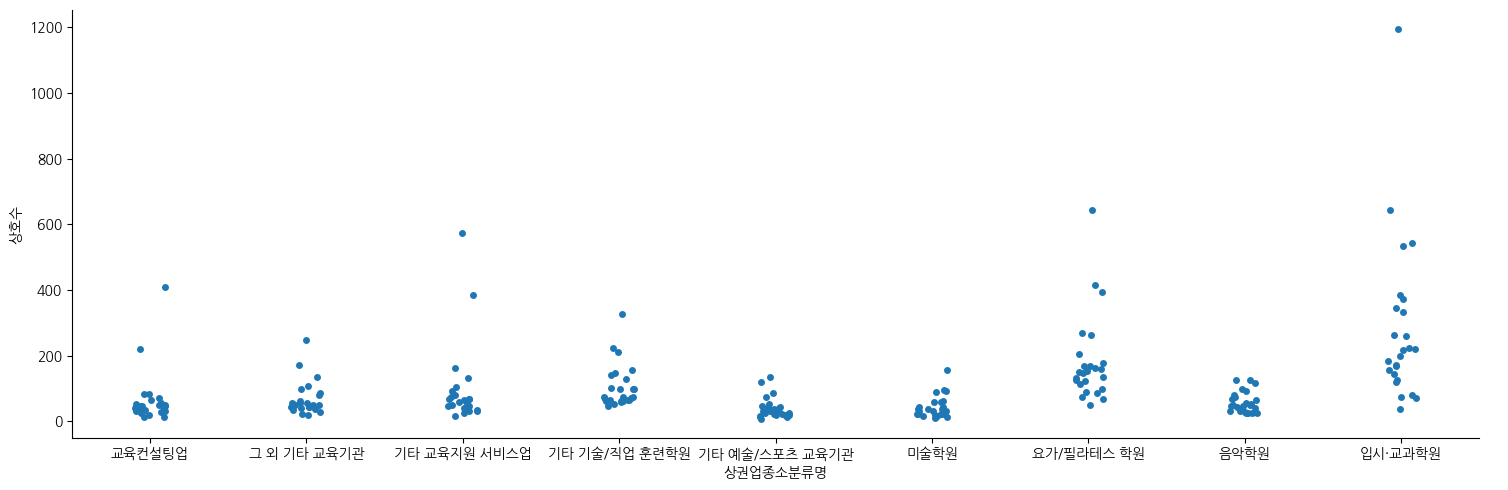

In [ ]:
# 그래프사이즈를 20,5로 하기
# 카테고리형 그래프로 그리기
# t 데이터 이용, x축 상권업종소분류명, y축 상호수
# 에러막대 없애고 그래프 사이즈를 3배 키우기
plt.figure(figsize = (20, 5))
sns.catplot(data = t,x = '상권업종소분류명', y = '상호수', errorbar = None, aspect = 3)

<Figure size 2000x500 with 0 Axes>

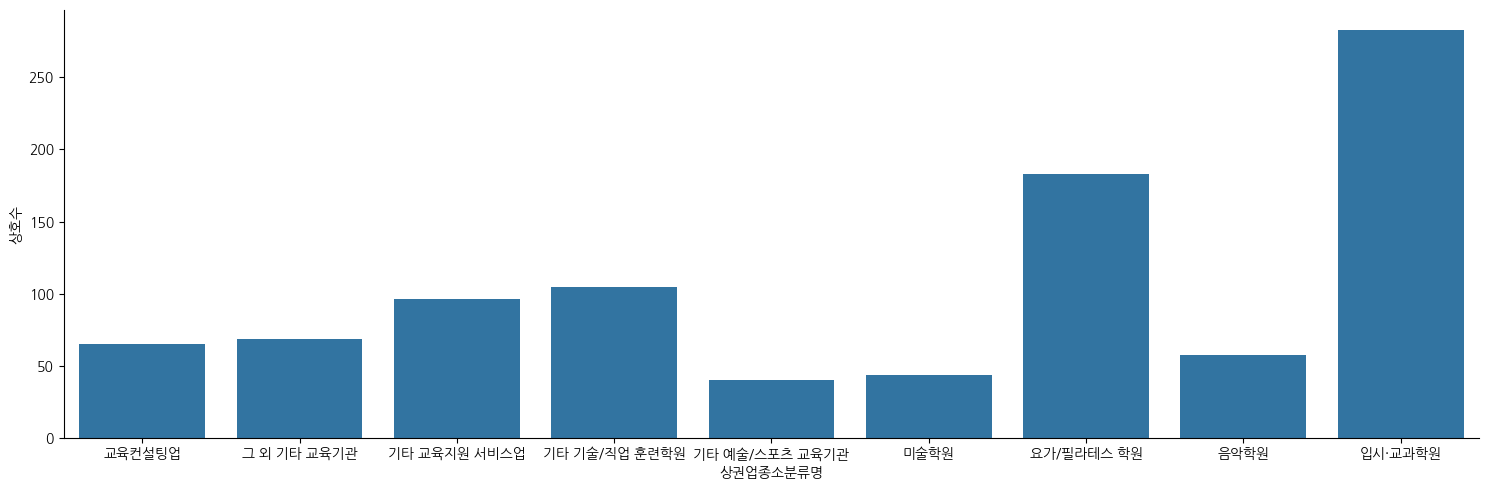

In [ ]:
# 그래프사이즈를 20,5로 하기
# 카테고리형 그래프를 사용해야 한다.
# 데이터는 t, x = 상권업종중분류명, y = 상호수
# 에러바 없애기 그래프 크기 3배 종류 = 바그래프
plt.figure(figsize = (20, 5))
sns.catplot(data = t,x = '상권업종소분류명', y = '상호수', errorbar = None, aspect = 3, kind = 'bar')

<Figure size 2000x500 with 0 Axes>

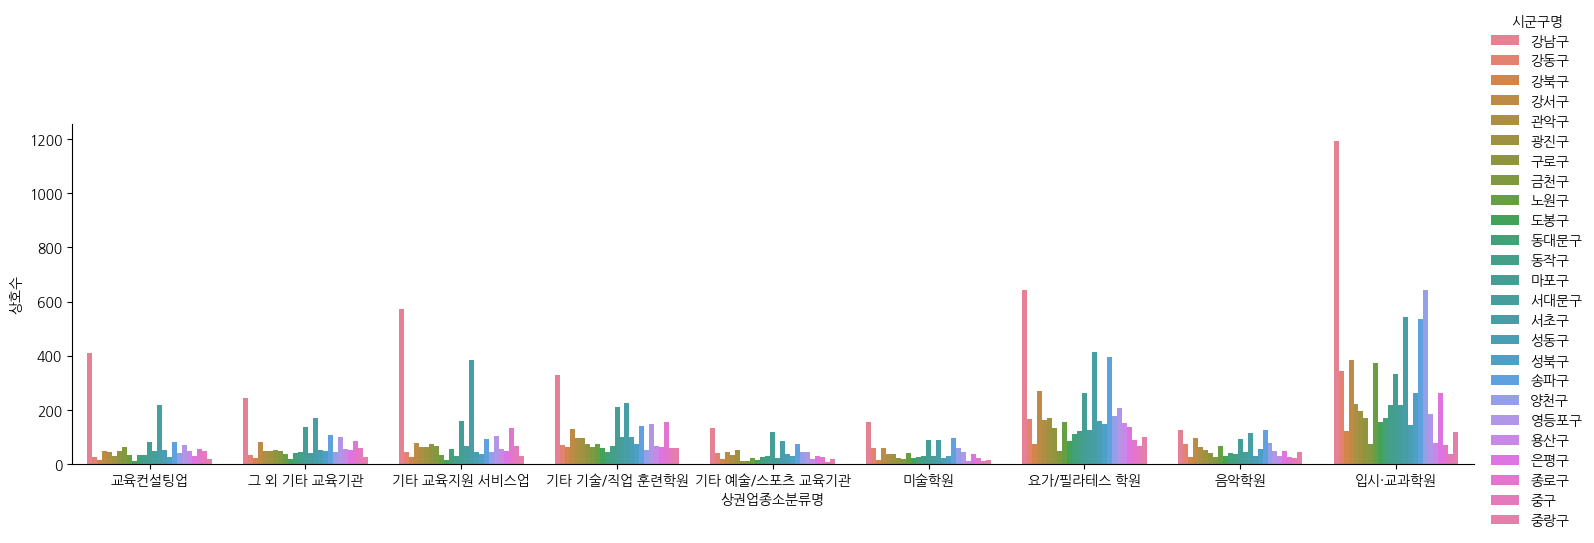

In [ ]:
# 그래프 사이즈 20, 5로 하기
# 카테고리형 그래프로 그리기
# data를 t변수를 사용하고 x = 상권업종소분류명, y = 상호수, 에러바 없애고 그래프크기 3배, 종류는 바그래프로 하고 범례를 시군구명으로 하기
plt.figure(figsize = (20, 5))
sns.catplot(data = t,x = '상권업종소분류명', y = '상호수', errorbar = None, aspect = 3, kind = 'bar',hue = '시군구명')

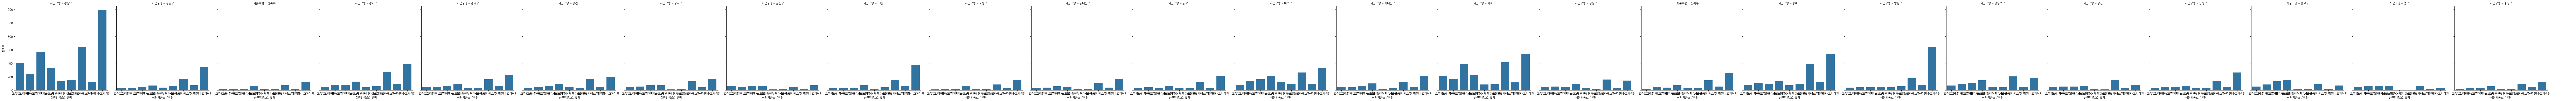

In [ ]:
# 카테고리형 그래프 그리기
# data를 t변수 사용하고 x = 상권업종소분류명 , y = 상호수, 종류는 바그래프로 하고 시군구명으로 나누기
sns.catplot(data = t,x = '상권업종소분류명', y = '상호수',kind = 'bar', col  = '시군구명')

<ipython-input-132-c71283e52be2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data = t,x = '상권업종소분류명', y = '상호수',kind = 'bar', col  = '시군구명',col_wrap=3, sharex=False, sharey=False, aspect=3, palette="Set2")


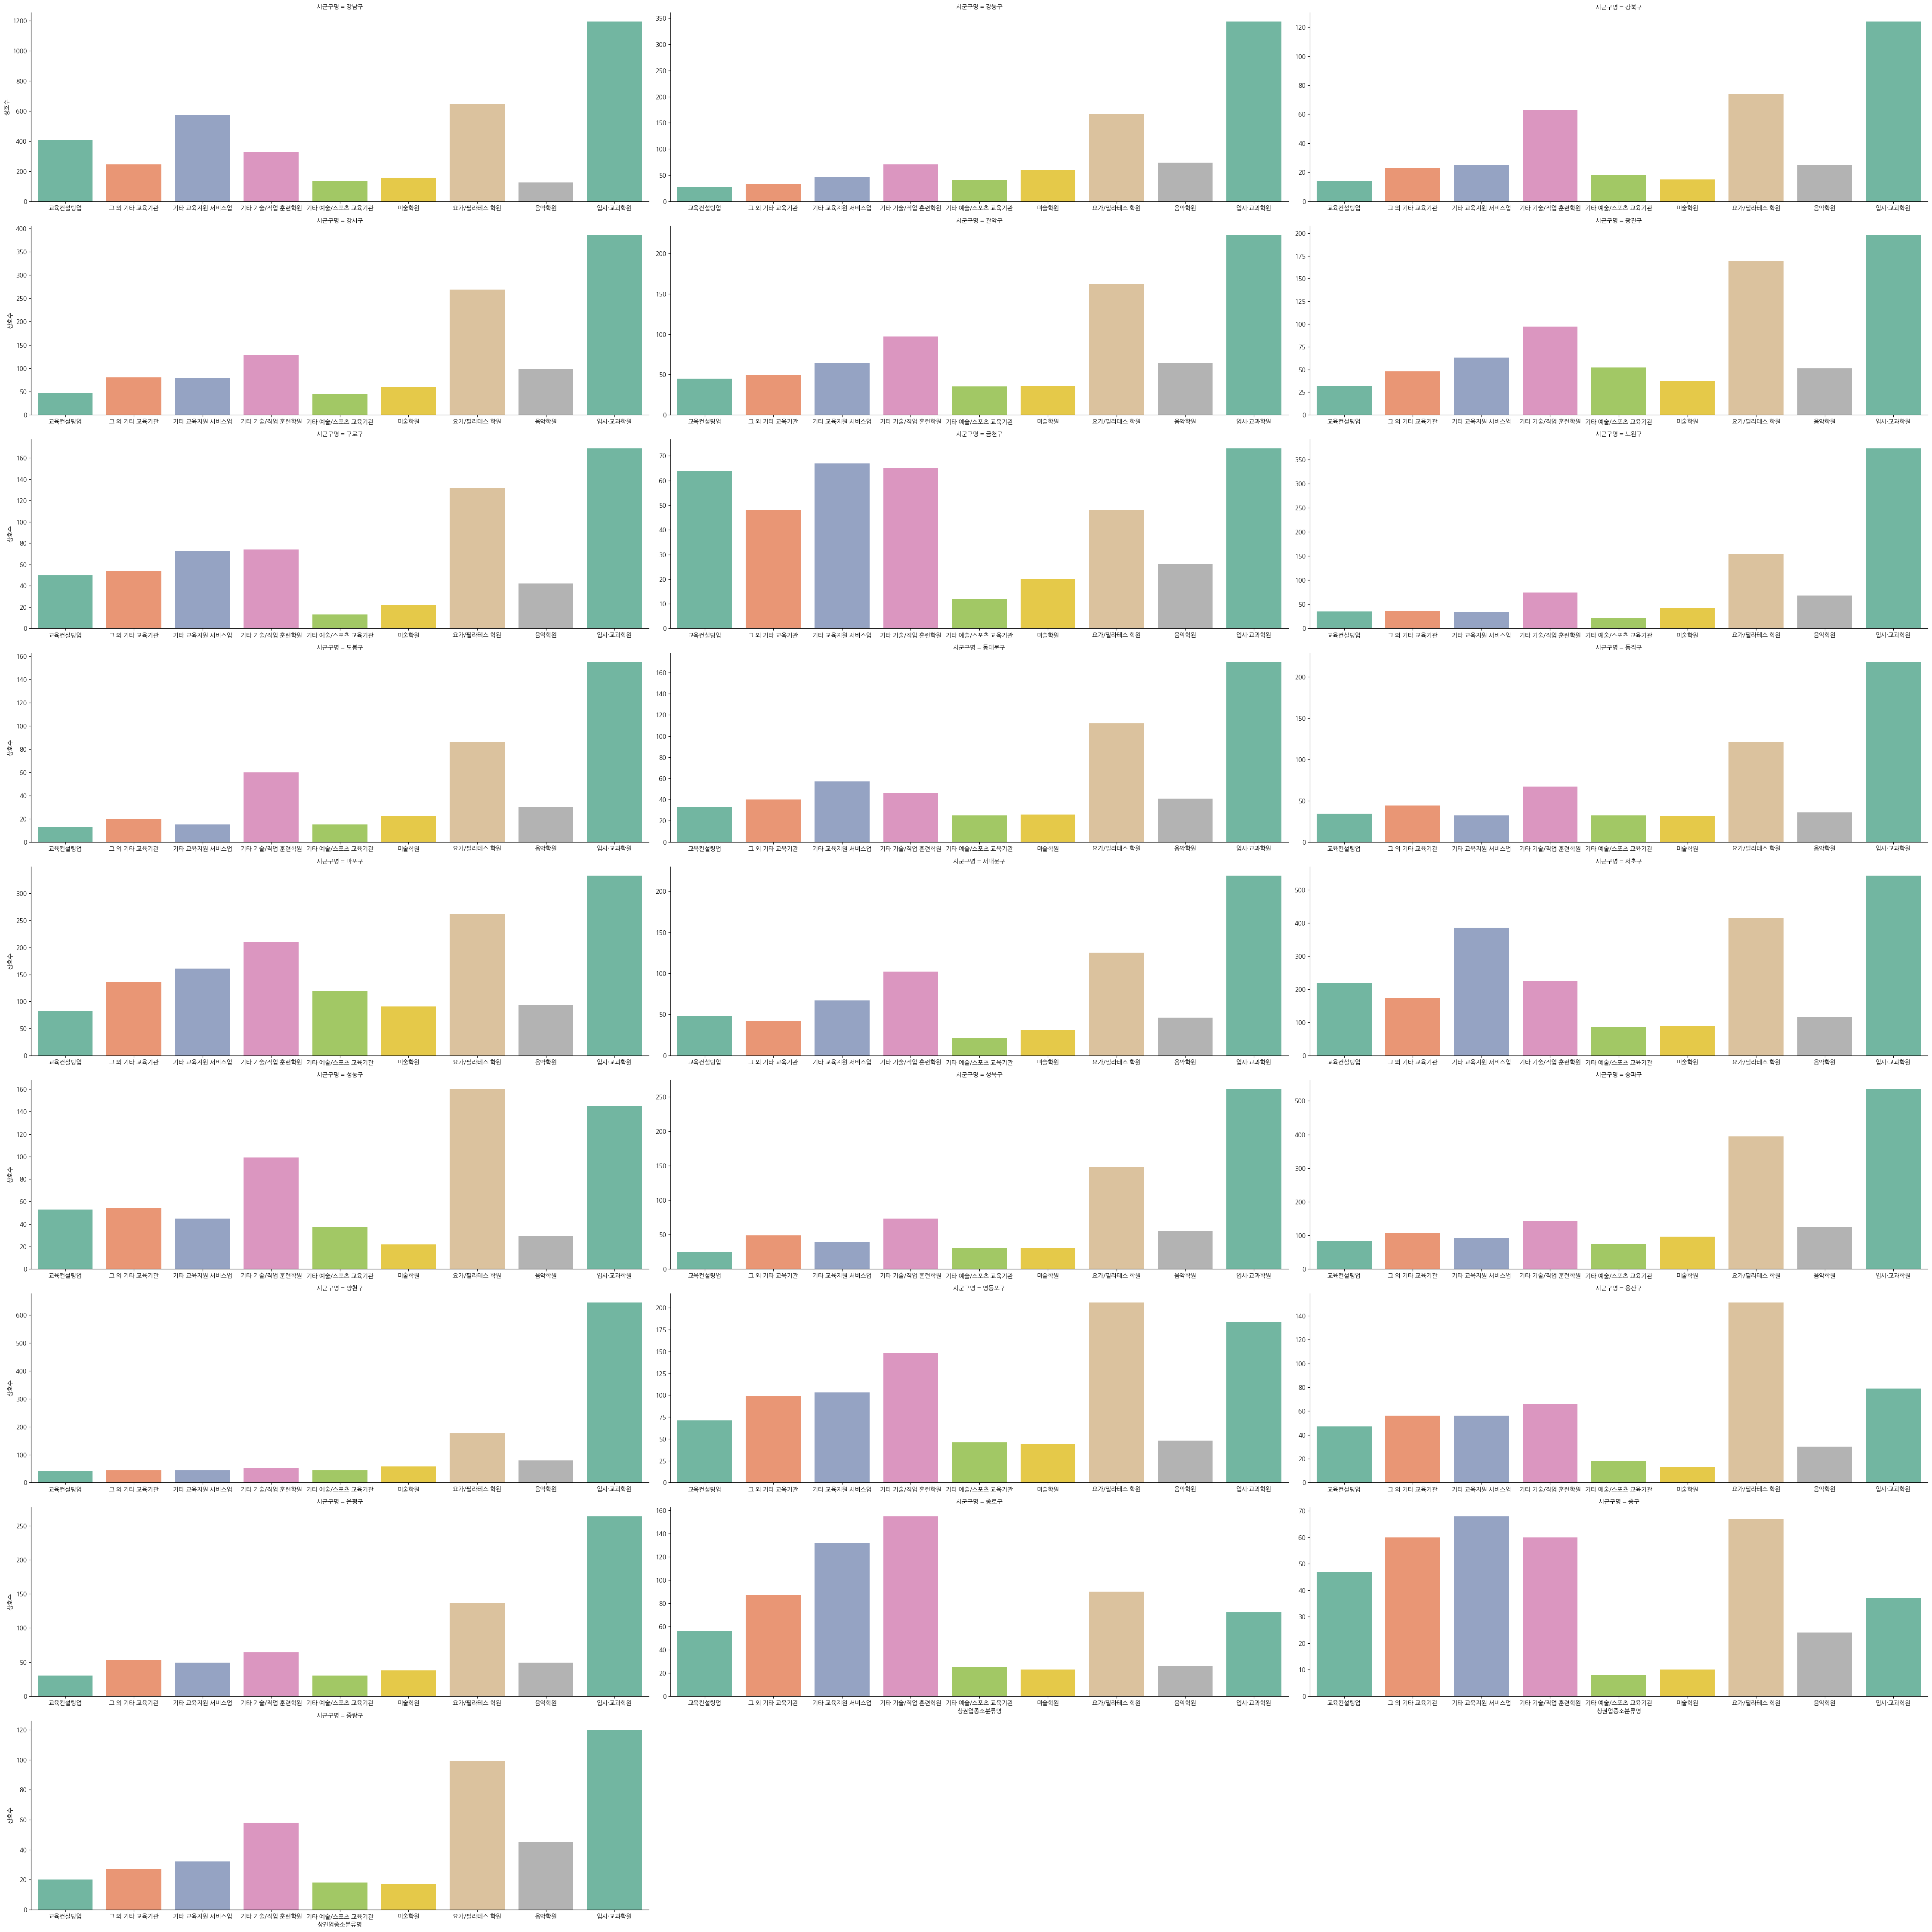

In [ ]:
# 카테고리형 그래프 그리기
# data는 t로 하고 x는 상권업종소분류명, y = 상호수, 종류는 바그래프로 그리세요
# 시군구명으로 나누고 그래프 3개 열로 출력하세요
# x와 y의 공유기능을 제거하고 그래프 사이즈를 3배로 하세요.
# 그래프 색깔을 Set2로 하세요.
sns.catplot(data = t,x = '상권업종소분류명', y = '상호수',kind = 'bar', col  = '시군구명',col_wrap=3, sharex=False, sharey=False, aspect=3, palette="Set2")

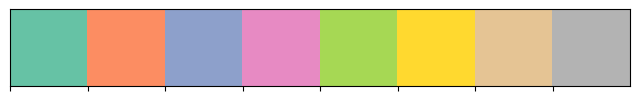

In [ ]:
# 팔레트 색깔중 하나인 Set2의 색깔을 출력하세요
sns.palplot(sns.color_palette('Set2'))

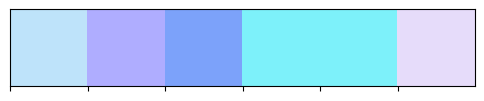

In [ ]:
# 지정한 6개의 색깔을 리스트에 담고 출력하세요
# '#BEE3FA','#AFADFF','#7CA2FA','#7DF1FA','#7DF1FA','#E6DCFA'
minseo = ['#BEE3FA','#AFADFF','#7CA2FA','#7DF1FA','#7DF1FA','#E6DCFA']
minseoplate = sns.color_palette(minseo)
sns.palplot(sns.color_palette(minseoplate))

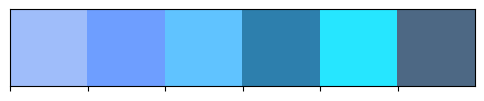

In [ ]:
# 이것도 해보세요
#'#9FBDFA', '#6E9EFF','#60C3FF','#2D7FAD','#26E6FF','#4D6884'
minseo2 = ['#9FBDFA', '#6E9EFF','#60C3FF','#2D7FAD','#26E6FF','#4D6884']
minseoplate2 = sns.color_palette(minseo2)
sns.palplot(sns.color_palette(minseoplate2))

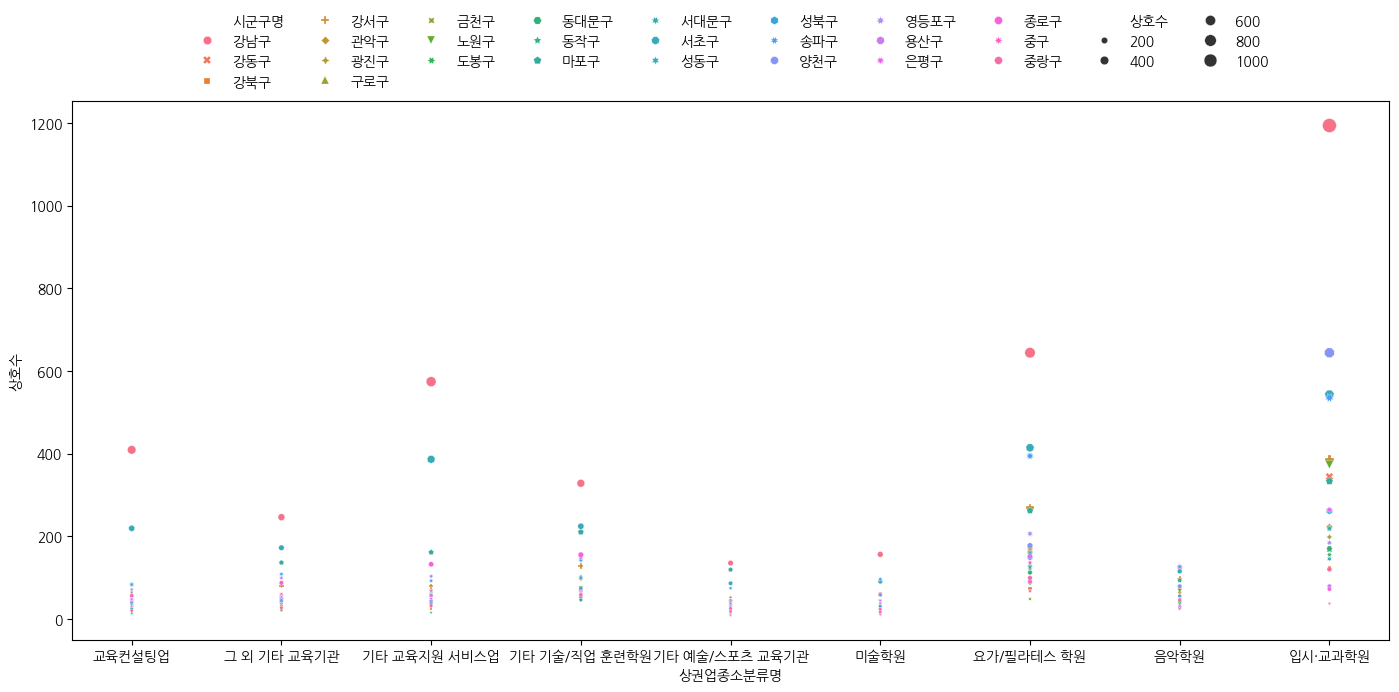

In [ ]:
# 그래프 크기를 17, 7으로 하고
# 스케쳐그래프로 그리고 데이터를 t, x = 상권업종소분류명, y = 상호수 범례를 시군구명으로 하고 style을 시군구명별로 만들고 size는 상호수에 따라 다르게 하고 크기사이즈를 최소 5, 최대 100으로 지정한다음
# ax에 변수에 담아주세요
# 범례표를 아래 중간으로 맞추고 박스 위치를 0.5, 1로 맞추세요. 범례표의 프레임을 없애고 한줄에 범례 갯수를 10개로 설정하세요.
plt.figure(figsize = (17,7))
ax = sns.scatterplot(data = t, x = '상권업종소분류명', y = '상호수', hue = '시군구명', style = '시군구명', size = '상호수', sizes = (5,100))
sns.move_legend(ax, 'lower center', bbox_to_anchor = (0.5,1), frameon = False, ncol = 10)